# Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

#### Tweet Archives

In [2]:
# Read in from CSV
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Image Predictions

In [3]:
# Set up outfile and url
filename = 'predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open(filename, mode = 'wb') as file:
    file.write(response.content)

# Read in from TSV
predictions = pd.read_csv(filename, sep = '\t')
predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Tweet Statistics from Twitter API

In [4]:
consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Set up api using json parser to store in correct format
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [5]:
# Break tweet ids into chunks of 100, as this is max query size for GET statuses/lookup 
tweet_ids = archive['tweet_id'].tolist()
tweet_ids_chunks = [tweet_ids[x : x + 100] for x in range(0, len(tweet_ids), 100)]

all_tweets = []

start = time.time()

# Itterate over each chunk appending to all tweets
for chunk in tweet_ids_chunks:
    # User and entities information is not needed
    chunk_response = api.statuses_lookup(chunk, trim_user = True, include_entities = False)
        
    for individual_tweet in chunk_response:
        all_tweets.append(individual_tweet)
                
    print('Last tweet ID - {:>18}, {:>4} tweets in {:5.2f} s, {:^1} tweets mising'\
          .format(chunk[-1], len(all_tweets), time.time() - start, len(chunk) - len(chunk_response)))

# Write tweets to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(all_tweets, file)
    print('Finished Writing JSON file,', len(all_tweets), 'tweets saved')

Last tweet ID - 872967104147763200,   98 tweets in  0.59 s, 2 tweets mising
Last tweet ID - 854120357044912130,  195 tweets in  1.14 s, 3 tweets mising
Last tweet ID - 836989968035819520,  292 tweets in  1.82 s, 3 tweets mising
Last tweet ID - 824796380199809024,  391 tweets in  2.30 s, 1 tweets mising
Last tweet ID - 813127251579564032,  491 tweets in  2.85 s, 0 tweets mising
Last tweet ID - 798682547630837760,  590 tweets in  3.39 s, 1 tweets mising
Last tweet ID - 786286427768250368,  690 tweets in  3.89 s, 0 tweets mising
Last tweet ID - 772826264096874500,  789 tweets in  4.48 s, 1 tweets mising
Last tweet ID - 758828659922702336,  889 tweets in  5.00 s, 0 tweets mising
Last tweet ID - 748220828303695873,  989 tweets in  5.47 s, 0 tweets mising
Last tweet ID - 735991953473572864, 1089 tweets in  5.98 s, 0 tweets mising
Last tweet ID - 716791146589110272, 1189 tweets in  6.71 s, 0 tweets mising
Last tweet ID - 707738799544082433, 1289 tweets in  7.25 s, 0 tweets mising
Last tweet I

In [6]:
# Read in from json
tweet_json = pd.read_json('tweet_json.txt')
tweet_json.head(2)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-06-18 16:57:37,NaN,18911,False,NaN,876484053909872640,876484053909872640,NaN,...,NaN,NaN,NaN,2459,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,True,"{'id': 4196983835, 'id_str': '4196983835'}"
1,NaN,NaN,2017-07-15 23:25:31,NaN,21262,False,NaN,886366144734445568,886366144734445568,NaN,...,NaN,NaN,NaN,3237,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,True,"{'id': 4196983835, 'id_str': '4196983835'}"


In [7]:
# Find which tweets from archive were not pulled by the lookup
missing_tweets = archive[~archive['tweet_id'].isin(list(tweet_json['id']))]
missing_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None


All these deleted/missing tweets are retweets and as such will be cleaned when all other retweets are removed.

# Assess

## Archive Table

In [8]:
# Find missing values, and retweets/replies
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeremy. He hasn't grown into his skin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,None,None,None,None
709,785170936622350336,NaN,NaN,2016-10-09 17:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hero. He was enjoying the car ride unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785170936...,11,10,Hero,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None


In [10]:
# Check ratings
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# Numerators follow no scheme whereas denominators are generally 10
# Viewing exceptions
for denominator in archive.rating_denominator.unique():
    print(list(archive[(archive['rating_denominator'] == denominator) & 
                       (archive['rating_denominator'] != 10)]['text']))

[]
["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]
['@docmisterio account started on 11/15/15']
['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd']
['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']
['RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…', 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5']
['Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE']
['Say hello to this unbelievably well behaved squad of d

In [13]:
# Some ratings where numerator is a decimal are split incorrectly
with pd.option_context('max_colwidth', 200):
    display(archive[archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [14]:
# Text contains a shortened url and text
print((archive['text'][1]))

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV


In [15]:
# Lower case words classed as names are not names
archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [16]:
# Viewing the one character long names
with pd.option_context('max_colwidth', 200):
    display(archive[archive['name'].str.len() == 1][['name', 'text']].head(5))

,name,text
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
775,O,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
801,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW


In [17]:
# None should be NaN
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
# These are unclear
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Predictions

In [19]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
858,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,0.056548,False


In [20]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tweet Json

In [21]:
tweet_json.sample(5)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
706,NaN,NaN,2016-09-08 02:09:06,"{'media': [{'id': 773704673102557184, 'id_str'...",7202,False,NaN,773704687002451968,773704687002451968,None,...,NaN,NaN,NaN,1843,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,False,"{'id': 4196983835, 'id_str': '4196983835'}"
1590,NaN,NaN,2015-12-28 05:07:27,NaN,1773,False,NaN,681340665377193984,681340665377193984,dog_rates,...,NaN,NaN,NaN,309,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,False,"{'id': 4196983835, 'id_str': '4196983835'}"
2176,NaN,NaN,2015-11-27 00:43:49,"{'media': [{'id': 670040288568610816, 'id_str'...",786,False,NaN,670040295598354432,670040295598354432,None,...,NaN,NaN,NaN,117,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",😂😂😂 10/10 for the dog and the owner https://t....,False,"{'id': 4196983835, 'id_str': '4196983835'}"
1030,NaN,NaN,2016-06-08 02:41:38,"{'media': [{'id': 740373148126859264, 'id_str'...",37417,False,NaN,740373189193256964,740373189193256960,None,...,NaN,NaN,NaN,14744,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",False,"{'id': 4196983835, 'id_str': '4196983835'}"
822,NaN,NaN,2016-08-29 01:22:47,"{'media': [{'id': 770069132691795970, 'id_str'...",8272,False,NaN,770069151037685760,770069151037685760,None,...,NaN,NaN,NaN,2594,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Carbon. This is his first time sw...,False,"{'id': 4196983835, 'id_str': '4196983835'}"


In [22]:
# Find any empty columns and null values
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 28 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   2345 non-null datetime64[ns]
extended_entities            1824 non-null object
favorite_count               2345 non-null int64
favorited                    2345 non-null bool
geo                          0 non-null float64
id                           2345 non-null int64
id_str                       2345 non-null int64
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null float64
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null float64
is_quote_status              2345 non-null bool
lang                         2345 non-null object
place                        1 non-null object
possibly_sensitive           2207 non-null float64
quoted

## Assesment Summary

#### Quality

##### ``archives`` table

- Retweets and replies are included
- Incorrect data format for `timestamp`
- Incorrect rating data
    - Decimal numerators are split
    - Pulls from first fraction which may not be rating
- Ratings should be normalised to score out of 10
    - Some ratings are groups of dogs
- Incorrect name data
    - O'Malley
    - Incorrect words taken as names (lowercase)
- Missing data should be NaNs
    - `dog type` and `name`
- Tweet source unintuitive

##### `predictions` table

- No apparent quality issues

##### `tweet_json` table

- Missing tweets, 2346 vs 2355, owing to deleted tweets no longer available
    - As seen these tweets are retweets/replies so will be dropped
- Retweets and replies are included
- Empty columns


#### Tidiness

- id_str is duplicate of id in `tweet_json`
- Two variables in one column in `archive` `text`, shortened_url and text
- One variable in four columns in `archive` table, dog type
- Retweet count and favourite count from `tweet_json` should be attached to `archive`
- Predictions from `predictions` should be attached to `archive`

# Clean

In [23]:
# Make copy of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_json_clean = tweet_json.copy()

## Incorrect and Missing Data

### Retweets and Replies

- Remove retweets and replies from `archive` and `tweet_json`

In [24]:
archive_clean.info(), tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(None, None)

- Retweets and replies are indicated by having values in `'in_reply_to_status_id'` or `retweeted_status_id` values

In [25]:
# Remove rows which have values in these columns
archive_clean = archive_clean[pd.isnull(archive_clean['in_reply_to_status_id'])]
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_id'])]

tweet_json_clean = tweet_json_clean[pd.isnull(tweet_json_clean['in_reply_to_status_id'])]
tweet_json_clean = tweet_json_clean[pd.isnull(tweet_json_clean['retweeted_status'])]

##### Test

In [26]:
archive_clean.info(), tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

(None, None)

### Empty Columns

- Remove unnecessary columns

In [27]:
# Remove empty and not-needed columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                    'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

tweet_json_clean.drop(['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name','in_reply_to_status_id', 
                       'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str', 
                       'retweeted_status'], axis = 1, inplace = True)

##### Test

In [28]:
archive_clean.info(), tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2344
Data columns (total 19 columns):
created_at              2098 non-null datetime64[ns]
extended_entities       1727 non-null object
favorite_count          2098 non-null int64
favorited               2098 non-null bool
id                      2098 non-nul

(None, None)

### Duplicated Columns in `tweet_json` table
- `id_str` is duplicate of `id`

In [29]:
# Remove duplicated column
tweet_json_clean.drop(['id_str'], axis = 1, inplace = True)

##### Test

In [30]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2344
Data columns (total 18 columns):
created_at              2098 non-null datetime64[ns]
extended_entities       1727 non-null object
favorite_count          2098 non-null int64
favorited               2098 non-null bool
id                      2098 non-null int64
is_quote_status         2098 non-null bool
lang                    2098 non-null object
place                   1 non-null object
possibly_sensitive      2094 non-null float64
quoted_status           27 non-null object
quoted_status_id        27 non-null float64
quoted_status_id_str    27 non-null float64
retweet_count           2098 non-null int64
retweeted               2098 non-null bool
source                  2098 non-null object
text                    2098 non-null object
truncated               2098 non-null bool
user                    2098 non-null object
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 254.1+ KB


## Tidiness

### Two variables in one column

- text column contains two variables, shortened_url and text, in `archive` table
- Extract url from this column into its' own column

In [31]:
# Extract url and remove from text
archive_clean['shortened_url'] = archive_clean.text.str.extract(r'(https://t.co/.*)', expand = True)
archive_clean['text'].replace(regex = True, inplace = True, to_replace = r'( https://t.co/.*)',value = '')

##### Test

In [32]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean.head()[['text', 'shortened_url']])

,text,shortened_url
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f


### One variable in four columns
- Dog type is spread across four columns
- Move doggo, floofer, pupper, puppo into one dog_type column

In [33]:
# Create new column for no_type dogs
archive_clean['no_type'] = np.where((archive_clean['doggo'] == 'None') & (archive_clean['floofer'] == 'None') &
                                    (archive_clean['pupper'] == 'None') & (archive_clean['puppo'] == 'None'), 
                                    'no_type', 'None')

# Melt data frame over these columns
archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                                  'rating_numerator', 'rating_denominator', 'name', 'shortened_url'],
                        var_name = 'dog_type')

# Drop where dog type is not value
archive_clean = archive_clean[archive_clean['dog_type'] == archive_clean['value']]

# Drop intermediate value column
archive_clean = archive_clean.drop('value', axis = 1)

# Replace no_type with NaNs
archive_clean['dog_type'] = archive_clean['dog_type'].replace('no_type', np.nan)

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 10 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null object
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
shortened_url         2105 non-null object
dog_type              347 non-null object
dtypes: int64(3), object(7)
memory usage: 181.2+ KB


Doing this has created duplicates where there were two dog types listed, as seen below

In [35]:
list(archive_clean[archive_clean['tweet_id'].duplicated()]['text'])

["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs",
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously",
 'Pupper butt 1, Doggo 0. Both 12/10',
 'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time',
 "Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho",
 'This is just downright precious

As there are relatively few it is simplest just to drop these duplicates, taking the first

In [36]:
archive_clean = archive_clean.drop_duplicates('tweet_id')

##### Test

In [37]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean.head(5)[['text', 'dog_type']])

,text,dog_type
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,doggo
39,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo,doggo
86,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo,doggo
94,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo,doggo
95,Never doubt a doggo 14/10,doggo


### Retweets and Favorites should be in `archive` table
- Attach these columns on tweet_id

In [38]:
# Rename id to tweet_id
tweet_json_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)
# Merge
archive_clean = pd.merge(archive_clean, tweet_json_clean[['tweet_id', 'favorite_count', 'retweet_count']],
                        on = ['tweet_id'], how = 'left')

##### Test

In [39]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,shortened_url,dog_type,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://t.co/t1bfwz5S2A,doggo,32145,7543
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,https://t.co/YSI00BzTBZ,doggo,20507,3040


### Predictions should be in `archive` table
- Attach these columns on tweet_id

In [40]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
# Merge
archive_clean = pd.merge(archive_clean, predictions_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog',
                                                           'p2', 'p2_conf', 'p2_dog',
                                                           'p3', 'p3_conf', 'p3_dog']],
                         on = ['tweet_id'], how = 'left')

##### Test

In [42]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,shortened_url,dog_type,...,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://t.co/t1bfwz5S2A,doggo,...,7543,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,https://t.co/YSI00BzTBZ,doggo,...,3040,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


## Quality

### Incorrect data format
- Timestamp in `archive` table should be datetime

In [43]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

##### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
shortened_url         2094 non-null object
dog_type              336 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 n

### Incorrect Ratings
- Ratings where numerator is decimal are split
    - Requires changing to float
- Some ratings are pulled from the wrong fraction in the text

- As numerators are generally unconstrained the first issue can be adressed through looking at denominators

#### Numerator is Decimal

In [45]:
# Change types to float to allow decimals
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator', 
                                                                            'rating_denominator']].astype(float)
    
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
shortened_url         2094 non-null object
dog_type              336 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                19

In [46]:
# View instances where a decimal is read in the text fraction
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
124,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27.0,10.0
372,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5.0,10.0
774,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26.0,10.0


In [47]:
# For this few cases the correct values can be done by hand
correct_numerators = ((883482846933004288, 13.5), (786709082849828864, 9.75), 
                      (778027034220126208, 11.27), (680494726643068929, 11.26))

# Replace numerators with correct values
for i in range(len(correct_numerators)):
    archive_clean.loc[archive_clean['tweet_id'] == correct_numerators[i][0], 
                      'rating_numerator'] = correct_numerators[i][1]

##### Test

In [48]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
124,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
372,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
774,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


#### Wrong Fraction in Text

In [49]:
# Find cases where denominator != 10
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['text', 'tweet_id']])

,text,tweet_id
617,The floofs have been released I repeat the floofs have been released. 84/70,820690176645140481
668,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t,810984652412424192
917,Why does this never happen at my front door... 165/150,758467244762497024
1031,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",740373189193256964
1069,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,731156023742988288
1103,Happy 4/20 from the squad! 13/10 for all,722974582966214656
1133,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,716439118184652801
1158,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,713900603437621249
1180,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,710658690886586372
1199,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",709198395643068416


- These results can be sorted into groups as below:

| Group of Dogs      | Incorrect Fraction | No Rating Given    |
|--------------------|--------------------|--------------------|
| 820690176645140481 | 740373189193256964 | 810984652412424192 |
| 758467244762497024 | 722974582966214656 |                    |
| 731156023742988288 | 716439118184652801 |                    |
| 713900603437621249 | 682962037429899265 |                    |
| 710658690886586372 | 666287406224695296 |                    |
| 709198395643068416 |                    |                    |
| 704054845121142784 |                    |                    |
| 697463031882764288 |                    |                    |
| 684222868335505415 |                    |                    |
| 677716515794329600 |                    |                    |
| 675853064436391936 |                    |                    |

- The first group, where the rating represents a group of dogs is not an issue as we will calculate ratios
- The next group can be manually corrected as there are only 5 cases
- The lase case where no rating is given needs to be removed from the table

In [50]:
correct_fractions = ((740373189193256964, 14, 10), (722974582966214656, 13, 10), (716439118184652801, 11, 10),
                    (682962037429899265, 10, 10), (666287406224695296, 9, 10))

# Replace rating values with correct fractions
for i in range(len(correct_fractions)):
    archive_clean.loc[archive_clean['tweet_id'] == correct_fractions[i][0], 
                      'rating_numerator'] = correct_fractions[i][1]
    archive_clean.loc[archive_clean['tweet_id'] == correct_fractions[i][0], 
                      'rating_denominator'] = correct_fractions[i][2]
    
# Drop tweet where no rating is given    
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]

##### Test

In [51]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['text', 'tweet_id']])

,text,tweet_id
617,The floofs have been released I repeat the floofs have been released. 84/70,820690176645140481
917,Why does this never happen at my front door... 165/150,758467244762497024
1069,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,731156023742988288
1158,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,713900603437621249
1180,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,710658690886586372
1199,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",709198395643068416
1262,Here is a whole flock of puppers. 60/50 I'll take the lot,704054845121142784
1329,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,697463031882764288
1474,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,684222868335505415
1585,IT'S PUPPERGEDDON. Total of 144/120 ...I think,677716515794329600


### Ratings should be Normalised to Out of 10
- This will correct the above cases where a group of dogs has been rated
- Create new column with score out of 10, drop old columns

In [52]:
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator']
archive_clean = archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

##### Test

In [53]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,shortened_url,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,https://t.co/t1bfwz5S2A,doggo,32145,7543,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14.0
1,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,https://t.co/YSI00BzTBZ,doggo,20507,3040,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,12.0
2,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,None,https://t.co/EMYIdoblMR,doggo,27654,5545,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,12.0
3,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,Napolean,https://t.co/PR7B7w1rUw,doggo,20464,3552,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,12.0
4,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10,https://twitter.com/animalcog/status/871075758...,None,https://t.co/AbBLh2FZCH,doggo,21176,5645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0


### Incorrect Name Data
- O'Malley's name is wrong
- Lower case words are not names

In [54]:
# Fix OMalley
archive_clean['name'].replace('O', "O'Malley", inplace = True)

- Incorrect names start with a lower case character so can be easily dropped

In [55]:
# Replace cases where name starts with lower case value with None
archive_clean['name'].replace(regex = True, inplace = True, to_replace = r'\b[a-z][a-zA-Z0-9]*',value = 'None')

##### Test

In [56]:
archive_clean.name.unique()

array(['Cassie', 'Yogi', 'None', 'Napolean', 'Scout', 'Barney', 'Mimosa',
       'Meera', 'Rhino', 'Smiley', 'Miguel', 'Emanuel', 'Pete', 'Astrid',
       'Doobert', 'Loki', 'Cupid', 'Pilot', 'Duchess', 'Sundance', 'Sunny',
       'Bo', 'Dido', 'Chubbs', 'Rocky', 'Bones', 'Sobe', 'Rizzo', 'Pinot',
       'Deacon', 'Sampson', 'Combo', 'Anakin', 'Finley', 'Gerald',
       'Wishes', 'Maggie', 'Piper', 'Boomer', 'Divine', 'Lenox', 'Kellogg',
       'Kyle', 'Grizzwald', 'Doc', 'Blu', 'Moose', 'Petrick', 'Roscoe',
       'Gus', 'Ginger', 'Jed', 'Sierra', 'Rover', 'Jamesy', 'Pickles',
       'Clark', 'Ava', 'Gidget', 'Kona', 'Gabe', 'Cooper', 'Craig',
       'Ollie', 'Laika', 'Ralphy', 'Sophie', 'Huck', 'Winnie', 'Chelsea',
       'Willem', 'Louie', 'Jax', 'Lola', 'Milo', 'Malcolm', 'Zoe', 'Finn',
       'Edmund', 'Aqua', 'Baloo', 'Benji', 'Rory', 'Buckley', 'Rooney',
       'Rueben', 'Lillie', 'Ashleigh', 'Luther', 'Oliver', 'Derek',
       'Clyde', 'Smokey', 'Ozzy', 'Winston', 'Chuckles', '

### Missing Name Values
- Missing names 'None' should be replaced with NaNs

In [57]:
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

##### Test

In [58]:
archive_clean[archive_clean['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,name,shortened_url,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating


### Tweet Source is Unintuitive
- Can be clearer

In [59]:
# View all sources
archive_clean['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'], dtype=object)

In [60]:
# Replace from dict
source_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'iPhone',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Web'}
archive_clean.replace({'source' : source_dict}, inplace = True)
archive_clean['source'] = archive_clean['source'].astype('category')

##### Test

In [61]:
archive_clean['source'].unique()

[iPhone, Vine, TweetDeck, Web]
Categories (4, object): [iPhone, Vine, TweetDeck, Web]

## Save File

In [62]:
archive_clean.to_csv('twitter_archive_master.csv')

# Analysis

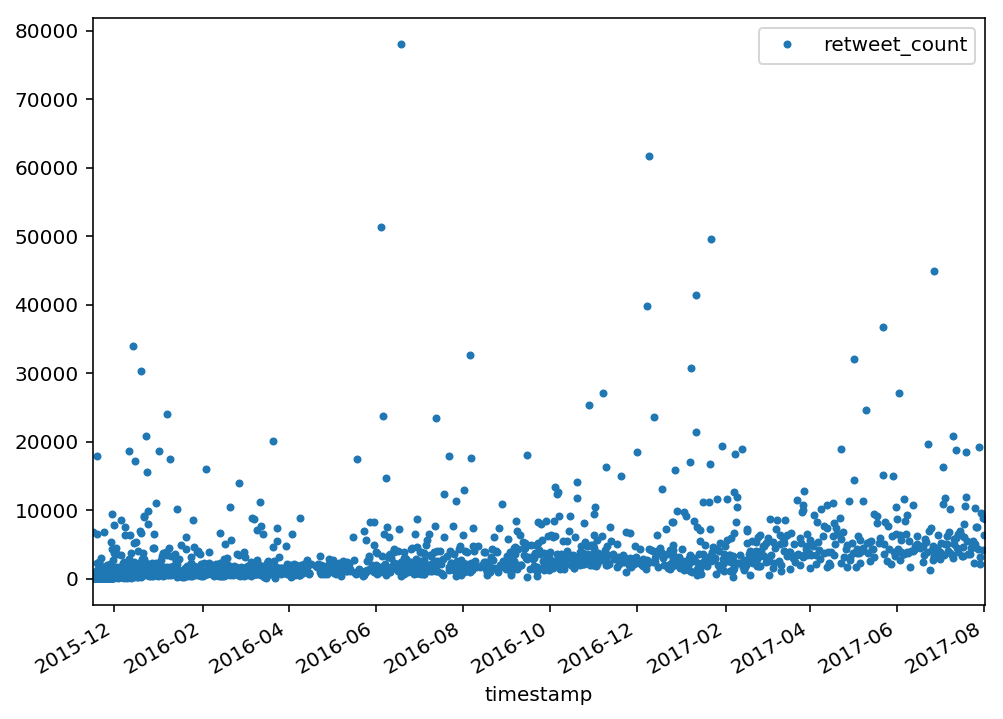

In [63]:
archive_clean.plot('timestamp', 'retweet_count', style = '.', figsize = (8,6))

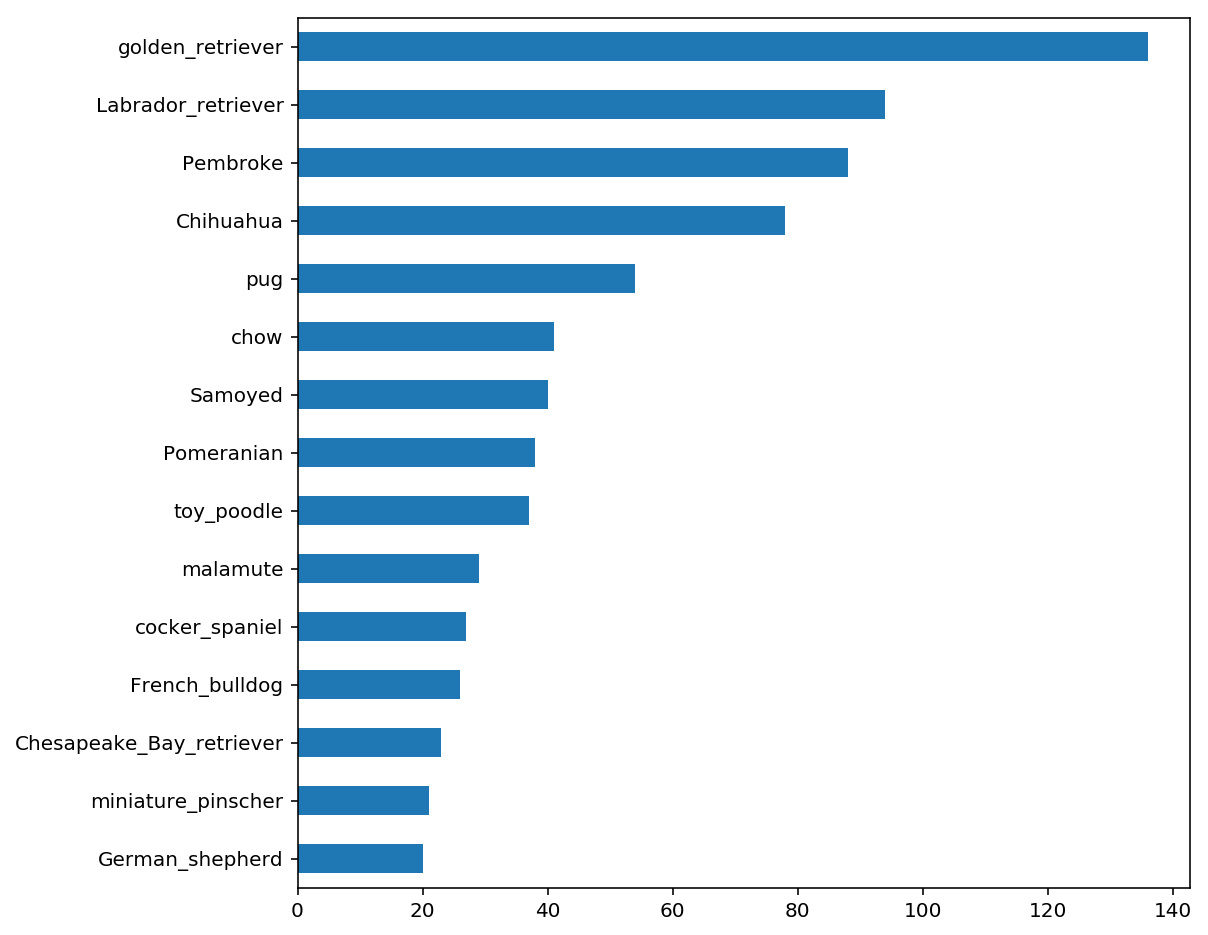

In [64]:
archive_clean.loc[archive_clean['p1_dog'] == True, 'p1'].value_counts()\
    .sort_values().tail(15).plot(kind='barh', figsize=(8,8))

In [65]:
common_dogs = archive_clean.loc[archive_clean['p1_dog'] == True, 'p1'].value_counts().sort_values().tail(20).keys()
common_dogs = archive_clean[archive_clean['p1'].isin(common_dogs)]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


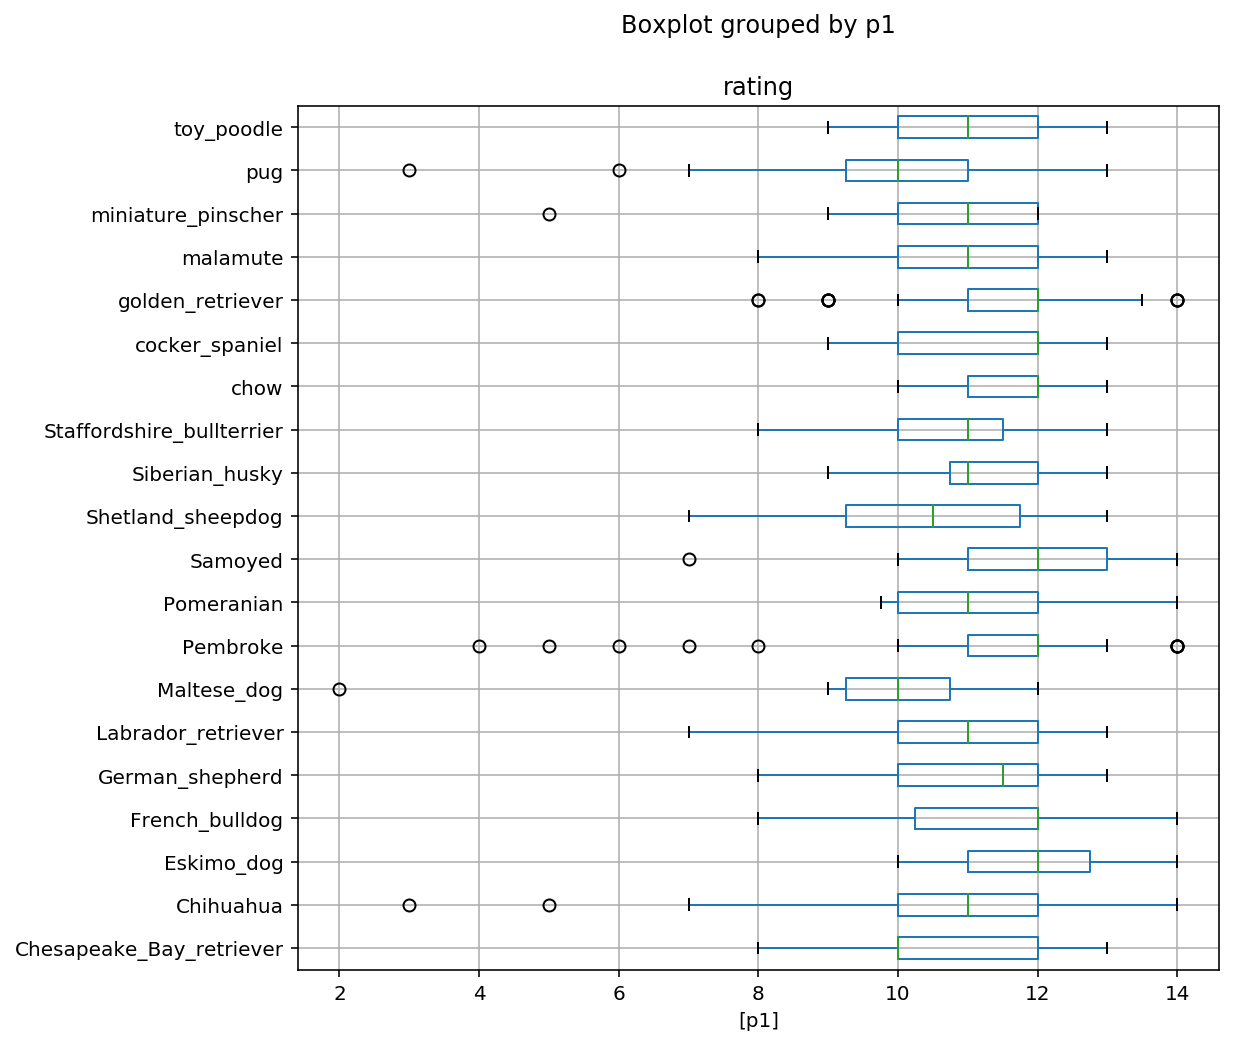

In [66]:
common_dogs[['p1', 'rating']].boxplot(by='p1', vert = False, figsize = (8,8))

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


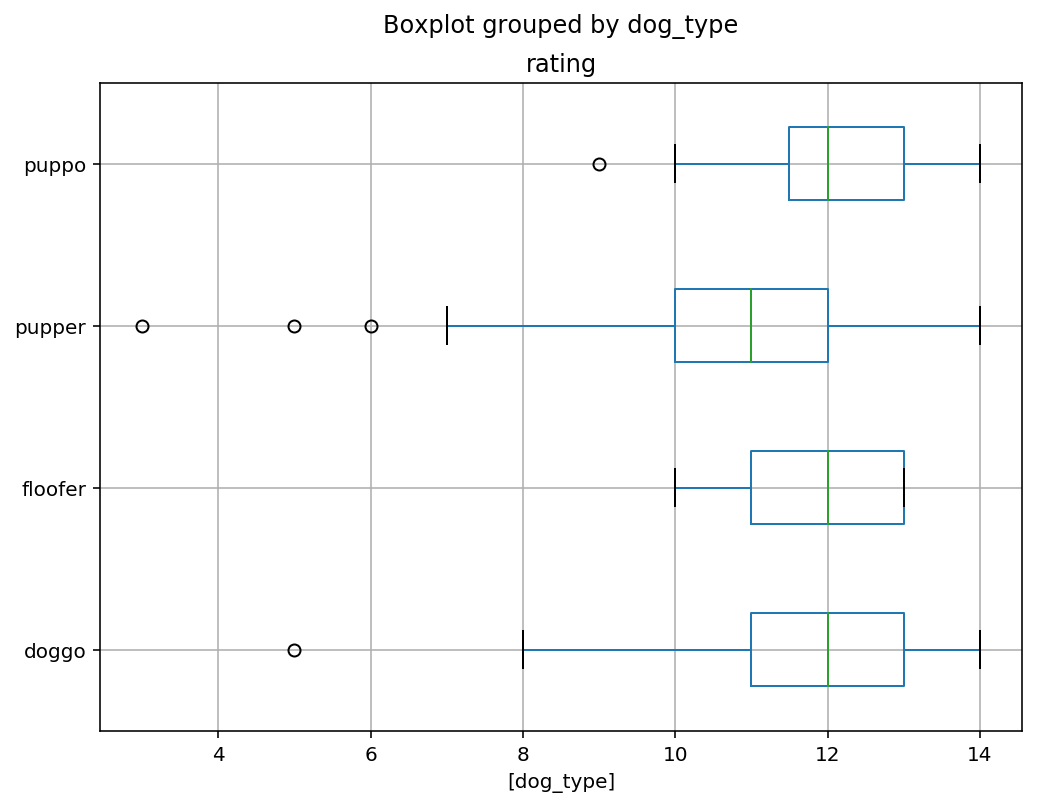

In [67]:
archive_clean[['dog_type', 'rating']].boxplot(by='dog_type', vert = False, figsize = (8,6))

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


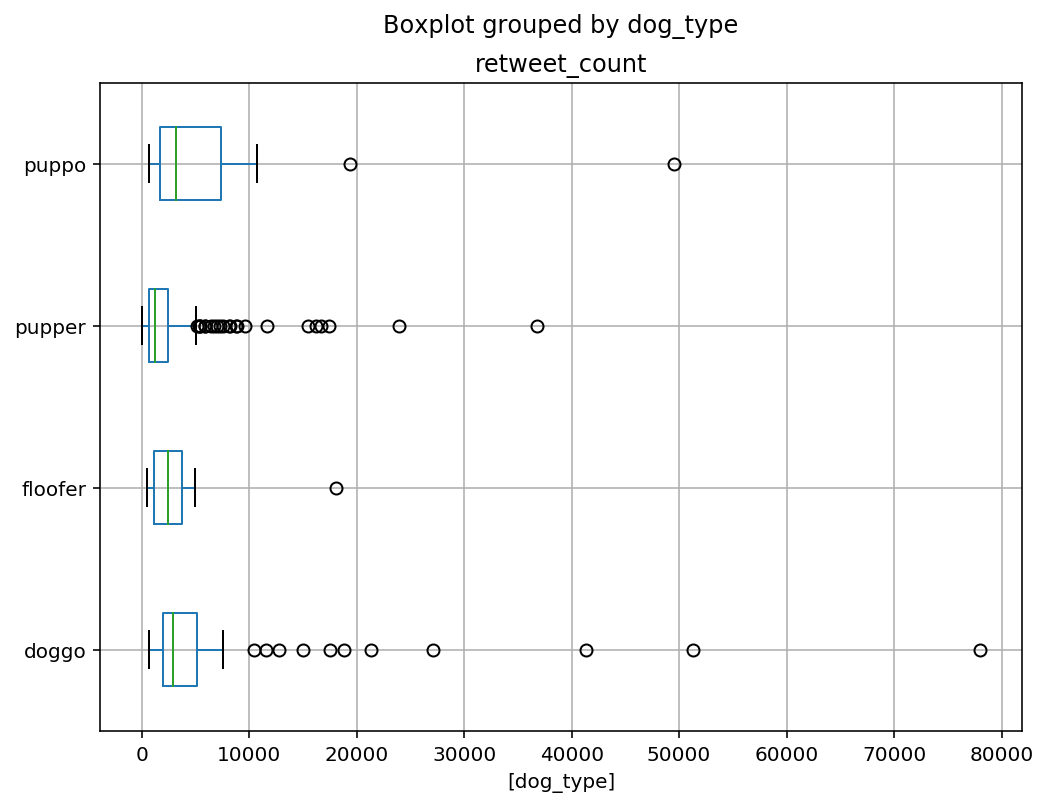

In [68]:
archive_clean[['dog_type', 'retweet_count']].boxplot(by='dog_type', vert = False, figsize = (8,6));

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


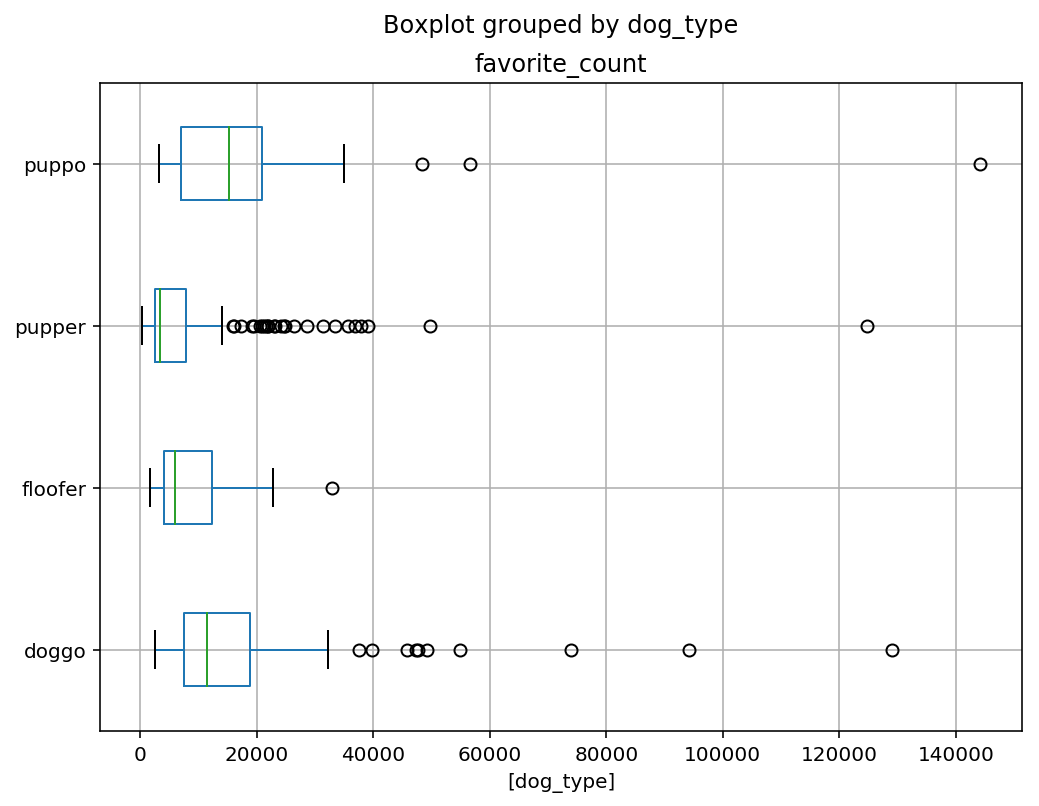

In [69]:
archive_clean[['dog_type', 'favorite_count']].boxplot(by='dog_type', vert = False, figsize = (8,6))